
##**<center>CSC12110 – Phân tích dữ liệu ứng dụng</center>**
##**<center>BÀI TẬP VỀ NHÀ</center>**
##**<center>BTTH#1.3: Mô tả dữ liệu</center>**
##<center>Nhóm 03</center>

###<center> Phạm Đức Anh - 18127064</center>
###<center> Phạm Xuân Tú - 18127056</center>
###<center> Lê Thị Thùy Dương - 18127086</center>

###**Mô tả bài tập**
1. Dataset: Mall Customer,
2. Đọc dữ liệu từ file csv, có phần header là dòng thứ 1
3. Thống kê mô tả đối với các trường trong bảng dữ liệu này.
4. Thực hiện explore data và nhận xét
5. Tính trung bình Annual income theo Gender, theo customer
6. Phân đều Age thành 5 nhóm độ tuổi sao cho mỗi nhóm chiếm 20% số quan sát.
7. Vẽ biểu đồ barchart thống kê số lượng khách hàng theo nhóm độ tuổi vừa tạo
được.
**Hãy thực hiện quan sát, xử lý dữ liệu trong tập dữ liệu này, gợi ý:**
* Mô tả ý nghĩa thuộc tính của tập dữ liệu
* Cho biết danh sách các column trong tập dữ liệu
* Mô tả thông tin của từng cột: count, min, max, mean...nhận xét
* Mô tả thông tin của từng cột (kiểu dữ liệu, tỷ lệ null, số record...)
* Vẽ biểu đồ quan sát sự phân bố dữ liệu của từng thuộc tính, có outlier
không? Nếu có hãy nêu cách xử lý
* Vẽ biểu đồ thể hiện sự tương quan giữa các thuộc tính
* Thống kê dữ liệu missing và xử lý
* Có tồn tại duplicate data không? Nếu có xử lý loại bỏ dòng trùng


**Thư viện**

In [ ]:
#import thư viện
import numpy as np 
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

**Upload file**

In [ ]:
data = files.upload()

Saving Mall_Customers.csv to Mall_Customers (2).csv


**Đọc file**

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Thông tin các cột**

Cột CustomerID : ID khách hàng<br>
Cột Gender : Giới tính khách hàng<br>
Cột Age : Tuổi của khách hàng<br>
Annual Income (k$) : Thu nhập của khách hàng<br>
Spending Score ( 1 - 100 ) : Điểm chi tiêu của khách hàng


**Số chiều trong dataset  - Dimesions of Dataset**

In [ ]:
print("Số dòng dữ liệu:",f"{df.shape[0]} instances")
print ("Số cột dữ liệu:",f"{df.shape[1]} attributes")

Số dòng dữ liệu: 200 instances
Số cột dữ liệu: 5 attributes


**Thông tin về dataset**

In [ ]:
df.info()

#Dataset có 200 dòng đánh số thứ tự từ 0 đến 199 
#Có 5 cột: 
#CustomerID kiểu dữ liệu int, tất cả 200 dòng dữ liệu đều đầy đủ không bị null; 
#Gender kiểu dữ liệu object, tất cả 200 dòng dữ liệu đều đầy đủ không bị null; 
#Age kiểu dữ liệu int, tất cả 200 dòng dữ liệu đều đầy đủ không bị null; 
#Annual Income (k$) kiểu dữ liệu int, tất cả 200 dòng dữ liệu đều đầy đủ không bị null; 
#Spending Score (1-100) kiểu dữ liệu int,tất cả 200 dòng dữ liệu đều đầy đủ không bị null


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Thống kê mô tả dữ liệu**

In [ ]:
# Kiểm tra chi tiết những thống kê mô tả cơ bản của dataframe như trung bình, phương sai, min, max, median
df.describe()

#count : số dòng dữ liệu trong cột CustomerID là 200 dòng, số dòng dữ liệu trong cột Age là 200 dòng, số dòng dữ liệu trong cột Annual Income (k$) là 200 dòng, số dòng dữ liệu trong cột Spending Score (1-100) là 200 dòng.
#mean : giá trị trung bình của cột CustomerID là 100.500000, giá trị trung bình của cột Age là 38.850000	, giá trị trung bình của cột Annual Income (k$) là 60.5600007, giá trị trung bình của cột Spending Score (1-100) là 50.200000.
#std : độ lệch chuẩn cột CustomerID là 57.879185, độ lệch chuẩn cột Age là 13.969007, độ lệch chuẩn cột Annual Income (k$) là 26.264721, độ lệch chuẩn cột Spending Score (1-100) là 25.823522.
#min : giá trị nhỏ nhất của cột CustomerID là 1.000000, giá trị nhỏ nhất của cột Age là 18.000000 , giá trị nhỏ nhất của cột Annual Income (k$) là 15.000000 , giá trị nhỏ nhất của cột Spending Score (1-100) là 1.000000.
#25% : cột CustomerID có 25% dữ liệu có giá trị 50.750000 trở xuống, cột Age có 25% dữ liệu có giá trị 28.750000 trở xuống, cột Annual Income (k$) có 25% dữ liệu có giá trị 41.500000 trở xuống, cột Spending Score (1-100) có 25% dữ liệu có giá trị 34.750000 trở xuống.
#50% : cột CustomerID có 50% dữ liệu có giá trị 100.500000 trở xuống, cột Age có 50% dữ liệu có giá trị 36.000000 trở xuống, cột Annual Income (k$) có 50% dữ liệu có giá trị 61.500000 trở xuống, cột Spending Score (1-100) có 50% dữ liệu có giá trị 50.000000 trở xuống.
#75% : cột CustomerID có 75% dữ liệu có giá trị 150.250000 trở xuống, cột Age có 75% dữ liệu có giá trị 49.000000 trở xuống, cột Annual Income (k$) có 75% dữ liệu có giá trị 78.000000 trở xuống, cột Spending Score (1-100) có 75% dữ liệu có giá trị 73.000000 trở xuống.
#max : giá trị lớn nhất cột CustomerID là 200.000000, giá trị lớn nhất cột Age là 70.000000, giá trị lớn nhất cột Annual Income (k$)  là 137.000000, giá trị lớn nhất cột Spending Score (1-100) là 99.000000.

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Xử lí dữ liệu bị missing data**

In [ ]:
# Kiểm tra số lượng dữ liệu bị thiếu trên từng cột và sắp xếp theo thứ tự giảm dần
df.isnull().sum().sort_values(ascending=False)

# Chú thích
# Data không bị missing data nên không cần xử lí

Spending Score (1-100)    0
Annual Income (k$)        0
Age                       0
Gender                    0
CustomerID                0
dtype: int64

In [ ]:
# Phần trăm dữ liệu null trên các cột
for column in df.columns:
  per = df[column].isnull().mean()
  print(f'{column}: {round(per*100,2)}%')

# Phần trăm các cột bị missing data là 0%

CustomerID: 0.0%
Gender: 0.0%
Age: 0.0%
Annual Income (k$): 0.0%
Spending Score (1-100): 0.0%


**Xử lí dữ liệu bị duplicate**

In [ ]:
# Số dòng bị duplicate
df.duplicated().sum()

# Do dữ liệu không bị trùng lặp nên không cần xóa

0

In [ ]:
# Xóa các dữ liệu bị thiếu
#df.dropna()

In [ ]:
# Điền dữ liệu bị thiếu bằng giá trị 1
#df.fillna(1)

**Xử lí dữ liệu ngoại lệ**

**Biểu đồ phân bố của cột Gender**

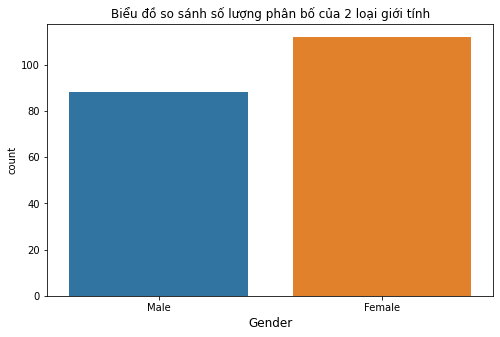

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data=df)
plt.xlabel('Gender', size = 12 )
plt.title('Biểu đồ so sánh số lượng phân bố của 2 loại giới tính')
plt.show()

# Giới tính phân bố không đồng đều, đa phần khách hàng nghiên về nữ giới

**Biểu đồ phân bố và xác định ngoại lai của Age, Annual Income (k$), Spending Score (1-100)**

In [ ]:
df.Age.describe()

count    198.000000
mean      38.929293
std       14.016852
min       18.000000
25%       28.250000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [ ]:
df.Gender.describe()

count        198
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [ ]:
df['Annual Income (k$)'].describe()

count    198.000000
mean      59.787879
std       25.237259
min       15.000000
25%       40.500000
50%       61.000000
75%       77.750000
max      126.000000
Name: Annual Income (k$), dtype: float64

In [ ]:
df['Spending Score (1-100)'].describe()

count    198.000000
mean      50.196970
std       25.746846
min        1.000000
25%       35.000000
50%       50.000000
75%       72.750000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [ ]:
def hisbox():
  # Age
  # Biểu đồ tần suất - histogram
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  df['Age'].plot(kind = 'hist', bins=15,alpha=.8)
  plt.xlabel('Age', size = 15 )
  plt.ylabel('Frequency', size = 15 )
  plt.title('Biểu đồ histogram về độ tuổi', size = 20)

  #Biểu đồ boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x = df['Age'])
  plt.xlabel('Age', size = 15 )
  plt.title('Biểu đồ boxplot về độ tuổi', size = 20)
  plt.show()


  #Annual Income (k$)
  # Biểu đồ tần suất - histogram
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  df['Annual Income (k$)'].plot(kind = 'hist', bins=15,alpha=.8)
  plt.xlabel('Thu nhập ', size = 15 )
  plt.ylabel('Frequency', size = 15 )
  plt.title('Biểu đồ histogram thu nhập ', size = 20)

  #Biểu đồ boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x = df['Annual Income (k$)'])
  plt.xlabel('Thu nhập ', size = 15 )
  plt.title('Biểu đồ boxplot thu nhập ', size = 20)
  plt.show()


  #Spending Score (1-100)
  # Biểu đồ tần suất - histogram
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  df['Spending Score (1-100)'].plot(kind = 'hist', bins=15, alpha=.8)
  plt.xlabel('Điểm chi tiêu', size = 15 )
  plt.ylabel('Frequency', size = 15 )
  plt.title('Biểu đồ histogram điểm chi tiêu', size = 20)

  #Biểu đồ boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x = df['Spending Score (1-100)'])
  plt.xlabel('Điểm chi tiêu', size = 15 )
  plt.title('Biểu đồ boxplot điểm chi tiêu', size = 20)
  plt.show()




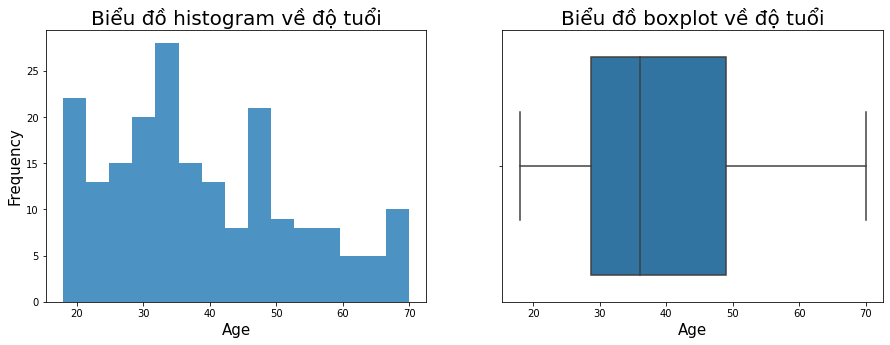

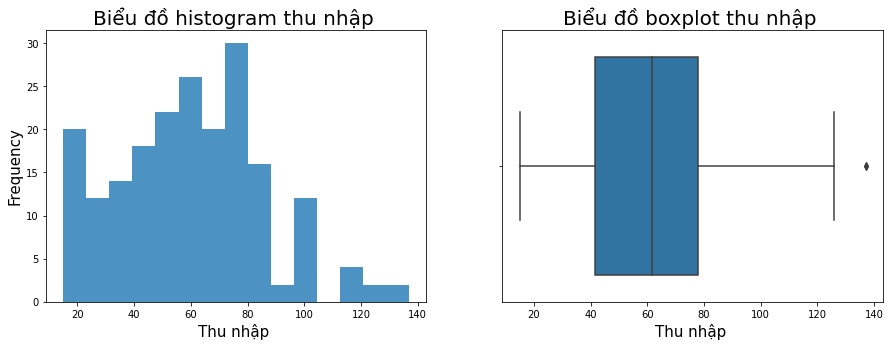

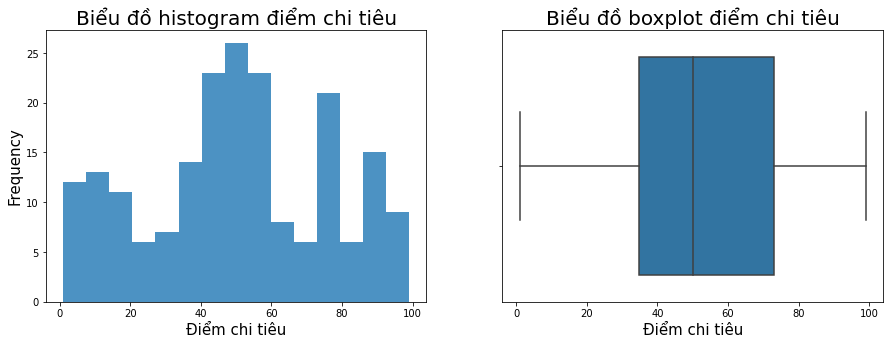

In [ ]:
hisbox()

**Xử lí xóa giá trị ngoại lệ**

In [ ]:
Q1 = df.quantile(0.25) # điểm tại giá trị min
Q3 = df.quantile(0.75) # điểm tahi giá trị max
Q1, Q3

(CustomerID                50.75
 Age                       28.75
 Annual Income (k$)        41.50
 Spending Score (1-100)    34.75
 Name: 0.25, dtype: float64, CustomerID                150.25
 Age                        49.00
 Annual Income (k$)         78.00
 Spending Score (1-100)     73.00
 Name: 0.75, dtype: float64)

In [ ]:
IQR = Q3 - Q1 # khoảng tứ phân phân vị
IQR

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [ ]:
lower_bound = Q1 - 1.5*IQR # chặn dưới
upper_bound = Q3 + 1.5*IQR # chặn trên
lower_bound, upper_bound

(CustomerID               -98.500
 Age                       -1.625
 Annual Income (k$)       -13.250
 Spending Score (1-100)   -22.625
 dtype: float64, CustomerID                299.500
 Age                        79.375
 Annual Income (k$)        132.750
 Spending Score (1-100)    130.375
 dtype: float64)

**Số lượng giá trị ngoại lệ**

In [ ]:
# xóa giá trị ngoại lệ
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis = 1)]
df.shape

(198, 5)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


**Tương quan**

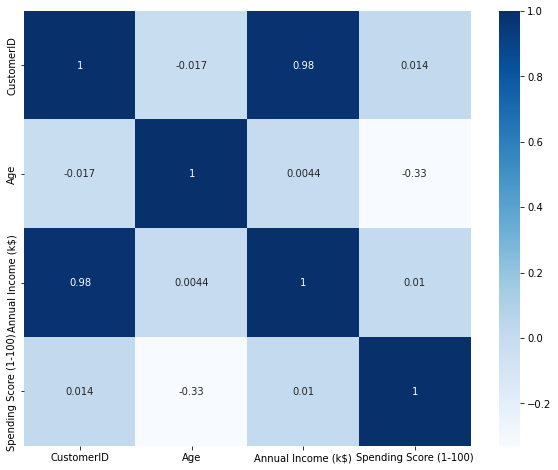

In [ ]:
plt.figure(figsize=(10,8))
c= df.corr()
sns.heatmap(c, annot = True, cmap = 'Blues')


**Trung bình Annual income theo Gender**

In [ ]:
df.groupby('Gender')['Annual Income (k$)'].mean()

Gender
Female    59.250000
Male      60.488372
Name: Annual Income (k$), dtype: float64

**Trung bình Annual income theo Customer**

In [ ]:
df.groupby('CustomerID')['Annual Income (k$)'].mean()

CustomerID
1       15
2       15
3       16
4       16
5       17
      ... 
194    113
195    120
196    120
197    126
198    126
Name: Annual Income (k$), Length: 198, dtype: int64

**Phân đều Age thành 5 nhóm độ tuổi sao cho mỗi nhóm chiếm 20% số quan sát.**

In [ ]:
gh = df.shape[0] / (100 / 20)
group_age = df.groupby('Age')[['CustomerID']].count() 

In [ ]:
group_age

,CustomerID
Age,
18,4
19,8
20,5
21,5
22,3
23,6
24,4
25,3
26,2
